In [1]:
import pandas as pd
import logging
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
mobility = pd.read_csv("Datasets/Google_Mobility_City_Daily.csv")
mobility.head(10)

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,2020,2,24,1,0.00571,-0.00286,.0714,.00286,0.02140,-0.00143,0.000625
1,2020,2,24,2,0.02000,-0.02410,.139,-.0206,-0.03260,0.01160,-0.009070
2,2020,2,24,3,0.04000,0.02710,.281,.0329,0.02570,-0.00857,0.014700
3,2020,2,24,4,0.02140,-0.00714,.00286,-.00286,0.02290,0.00286,-0.002060
4,2020,2,24,5,0.03290,-0.00143,.0386,.0471,0.01000,0.00286,-0.004610
5,2020,2,24,6,0.00571,-0.02000,.0214,.00143,0.01570,0.00143,-0.003320
6,2020,2,24,7,0.01140,-0.01290,.00857,-.01,0.03140,-0.00286,0.002660
7,2020,2,24,8,0.02290,-0.00571,.0657,.0271,0.00286,0.00286,-0.005010
8,2020,2,24,9,0.02430,-0.01140,.381,.0386,-0.03430,0.00000,0.001420
9,2020,2,24,10,0.00857,-0.00286,-.0114,.0371,0.02860,-0.00286,0.003970


In [2]:
dictionary = {}
rr = mobility[mobility["gps_retail_and_recreation"] > 0.02]
groceryPharma = mobility[mobility["gps_grocery_and_pharmacy"] > 0.02]
parks = mobility[mobility["gps_parks"] > str(0.02)]
ts = mobility[mobility["gps_transit_stations"] > str(-0.02)]
work = mobility[mobility['gps_workplaces']> 0.025]
resi = mobility[mobility['gps_residential'] > 0.2 ]
away = mobility[mobility['gps_away_from_home'] > -0.02]
dictionary["gps_retail_and_recreation"] = rr["gps_retail_and_recreation"].count()
dictionary["gps_grocery_and_pharmacy"] = groceryPharma["gps_grocery_and_pharmacy"].count()
dictionary["gps_parks"] = parks["gps_parks"].count()
dictionary["gps_transit_stations"] = ts["gps_transit_stations"].count()
dictionary["gps_workplaces"] = work["gps_workplaces"].count()
dictionary["gps_residential"] = resi["gps_residential"].count()
dictionary["gps_away_from_home"] = away["gps_away_from_home"].count()
for i in dictionary:
    print(i +":",dictionary[str(i)])


gps_retail_and_recreation: 896
gps_grocery_and_pharmacy: 2323
gps_parks: 698
gps_transit_stations: 856
gps_workplaces: 320
gps_residential: 1273
gps_away_from_home: 1040


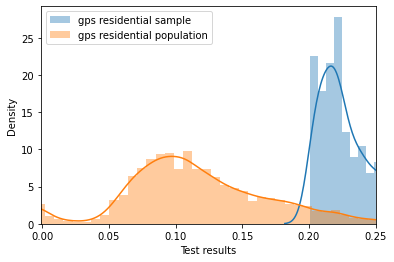

In [3]:
sns.distplot(resi['gps_residential'] , label = 'gps residential sample')
sns.distplot(mobility['gps_residential'], label = 'gps residential population')
plt.xlim(-0.001, 0.25)
plt.xlabel('Test results')
plt.legend()

In [4]:
print("Standard deviation of gps_residential sample: ",resi['gps_residential'].std())
print("Mean of gps_residential sample: ",resi['gps_residential'].mean())

Standard deviation of gps_residential sample:  0.026730122805301102
Mean of gps_residential sample:  0.23219952867242732


In [5]:
month = mobility.groupby("month")
month["month"].count()

month
1      159
2      318
3     1643
4     1590
5     1643
6     1590
7     1643
8     1643
9     1590
10    1643
11    1590
12    1643
Name: month, dtype: int64

In [6]:
deaths = pd.read_csv("Datasets/spain_excess_deaths.csv")
deaths.head(10)

,country,region,region_code,start_date,end_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Spain,Andalusia,1,2020-01-01,2020-01-07,2020,1,8405294,1542,0.0,1554.0,-12.0,1542.0,0.0,-0.142767,-0.007722
1,Spain,Andalusia,1,2020-01-08,2020-01-14,2020,2,8405294,1663,0.0,1646.0,17.0,1663.0,0.0,0.202253,0.010328
2,Spain,Andalusia,1,2020-01-15,2020-01-21,2020,3,8405294,1812,0.0,1629.5,182.5,1812.0,0.0,2.171251,0.111998
3,Spain,Andalusia,1,2020-01-22,2020-01-28,2020,4,8405294,1759,0.0,1656.0,103.0,1759.0,0.0,1.225418,0.062198
4,Spain,Andalusia,1,2020-01-29,2020-02-04,2020,5,8405294,1796,0.0,1635.5,160.5,1796.0,0.0,1.909511,0.098135
5,Spain,Andalusia,1,2020-02-05,2020-02-11,2020,6,8405294,1601,0.0,1646.5,-45.5,1601.0,0.0,-0.541326,-0.027634
6,Spain,Andalusia,1,2020-02-12,2020-02-18,2020,7,8405294,1512,0.0,1612.0,-100.0,1512.0,0.0,-1.189726,-0.062035
7,Spain,Andalusia,1,2020-02-19,2020-02-25,2020,8,8405294,1430,0.0,1572.5,-142.5,1430.0,0.0,-1.695360,-0.090620
8,Spain,Andalusia,1,2020-02-26,2020-03-03,2020,9,8405294,1393,0.0,1537.5,-144.5,1393.0,0.0,-1.719155,-0.093984
9,Spain,Andalusia,1,2020-03-04,2020-03-10,2020,10,8405294,1363,0.0,1477.0,-114.0,1363.0,0.0,-1.356288,-0.077183


In [7]:
dictionary1 = {}
total_deaths = deaths[deaths["total_deaths"] < 1500]
covid_deaths = deaths[(1 < deaths["covid_deaths"]) & (deaths["covid_deaths"] < 300)]
expected_deaths = deaths[deaths["expected_deaths"]<500]
excess_deaths = deaths[deaths["excess_deaths"]< 300]
non_covid_deaths = deaths[(1 < deaths["non_covid_deaths"]) & (deaths["non_covid_deaths"] < 200)]
covid_deaths_per_100k = deaths[deaths["covid_deaths_per_100k"]>10]
excess_deaths_per_100k = deaths[deaths["excess_deaths_per_100k"] > 0.1]
excess_deaths_pct_change = deaths[deaths["excess_deaths_pct_change"] > 0.1]
dictionary1["total_deaths"] = total_deaths["total_deaths"].count()
dictionary1["covid_deaths"] = covid_deaths["covid_deaths"].count()
dictionary1["expected_deaths"] = expected_deaths["expected_deaths"].count()
dictionary1["excess_deaths"] = excess_deaths["excess_deaths"].count()
dictionary1["non_covid_deaths"] = non_covid_deaths["non_covid_deaths"].count()
dictionary1["covid_deaths_per_100k"] = covid_deaths_per_100k["covid_deaths_per_100k"].count()
dictionary1["excess_deaths_per_100k"] = excess_deaths_per_100k["excess_deaths_per_100k"].count()
dictionary1["excess_deaths_pct_change"] = excess_deaths_pct_change["excess_deaths_pct_change"].count()
for i in dictionary1:
    print(i +":",dictionary1[str(i)])

total_deaths: 942
covid_deaths: 608
expected_deaths: 723
excess_deaths: 962
non_covid_deaths: 359
covid_deaths_per_100k: 48
excess_deaths_per_100k: 726
excess_deaths_pct_change: 504


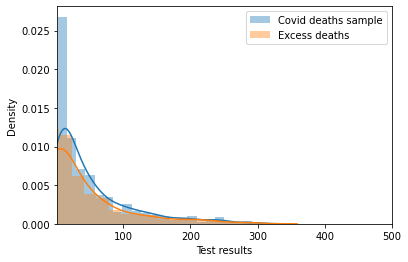

In [8]:
sns.distplot(covid_deaths['covid_deaths'] , label = 'Covid deaths sample')
sns.distplot(excess_deaths['excess_deaths'], label = 'Excess deaths')
plt.xlim(1, 500)
plt.xlabel('Test results')
plt.legend()

In [9]:
#Calculate z-score
import math
#Sample 1: Covid deaths
num1 = deaths["covid_deaths"].mean() - covid_deaths["covid_deaths"].mean()
sample_size1 = 608
med = num1**2/sample_size1
standard_population1 = deaths["covid_deaths"].std()
standard_sample1 = math.sqrt(med)
print("Standard deviation of covid deaths sample: ", standard_sample1)

#Sample 2: Excess deaths
num2 = deaths["excess_deaths"].mean() - covid_deaths["excess_deaths"].mean()
sample_size2 = 962
med = num2**2/sample_size2
standard_population2 = deaths["excess_deaths"].std()
standard_sample2 = math.sqrt(med)
print("Standard deviation of excess deaths sample: ", standard_sample2)

sample_mean1 = covid_deaths["covid_deaths"].mean()
population_mean1 = deaths["covid_deaths"].mean()
sample_mean2 = covid_deaths["excess_deaths"].mean()
population_mean2 = deaths["excess_deaths"].mean()
den = standard_population1/math.sqrt(sample_size1)
#z-score for one sample z test
z_score1 = (abs(population_mean1 - sample_mean1))/(standard_population1/den)
print("Sample mean: ", sample_mean1)
print("Population mean: ", population_mean1)
print("Population standard deviation: ", standard_population1)
print("Sample size: ", sample_size1)
print("Z-score: ", z_score1)
num = sample_mean1-sample_mean2 - population_mean1 + population_mean2
med1 = (standard_sample1**2/sample_size1) + (standard_sample2**2/sample_size2)
z_score2 = num/math.sqrt(med1)
print("Z-score: ", z_score2)
#z-score for two sample z test



Standard deviation of covid deaths sample:  1.9374195187628458
Standard deviation of excess deaths sample:  2.3385788593429044
Sample mean:  49.932565789473685
Population mean:  97.70478983382209
Population standard deviation:  388.9082048843275
Sample size:  608
Z-score:  1.9374195187628458
Z-score:  227.3830017777252


In [10]:
n1 = 630
n2 = 697
df = n1+n2-2
print("Degrees of freedom: ", df)


Degrees of freedom:  1325


In [25]:
#Calculate t-score
import math
x1 = covid_deaths["covid_deaths"].mean()
x2 = non_covid_deaths["non_covid_deaths"].mean()
p1 = deaths["covid_deaths"].mean()
p2 = deaths["non_covid_deaths"].mean()
s1 = covid_deaths["covid_deaths"].std()
s2 = non_covid_deaths["non_covid_deaths"].std()
num = abs((x1-x2)-(p1-p2))
den = ((s1**2)/n1) + ((s2**2)/n2)
den = math.sqrt(den)
t_score = num/den
print("Mean of covid deaths sample: ", x1)
print("Mean of non covid deaths sample: ", x2)
print("Mean of population of covid deaths: ", p1)
print("Mean of population of non covid deaths: ", p2)
print("Standard deviation of covid deaths: ", s1)
print("Standard deviation of non covid deaths: ", s2)
print("Sample size of covid deaths: ", n1)
print("Sample size of non covid deaths: ", n2)
print("t-score: ", t_score)

Mean of covid deaths sample:  49.932565789473685
Mean of non covid deaths sample:  91.66295264623956
Mean of population of covid deaths:  97.70478983382209
Mean of population of non covid deaths:  806.0371456500488
Standard deviation of covid deaths:  58.73732097328938
Standard deviation of non covid deaths:  65.24505198110661
Sample size of covid deaths:  630
Sample size of non covid deaths:  697
t-score:  195.85796557225905


In [27]:
x1 = covid_deaths_per_100k["covid_deaths_per_100k"].mean()
p1 = deaths["covid_deaths_per_100k"].mean()
s1 = covid_deaths_per_100k["covid_deaths_per_100k"].std()
sample_size1 = 48
num = abs(x1-p1)
den = s1/math.sqrt(sample_size1)
t_score = num/den
print("Mean of covid deaths per 100k sample: ", x1)
print("Mean of population of covid deaths per 100k: ", p1)
print("Standard deviation of sample of covid deaths per 100k: ", s1)
print("Sample size of covid deaths per 100k: ", sample_size1)
print("t-score: ", t_score)

Mean of covid deaths per 100k sample:  16.072397716458443
Mean of population of covid deaths per 100k:  2.115330205271514
Standard deviation of sample of covid deaths per 100k:  5.197312906798237
Sample size of covid deaths per 100k:  48
t-score:  18.605268135712134


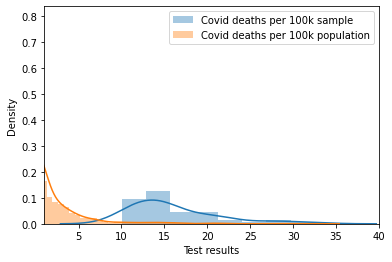

In [31]:
sns.distplot(covid_deaths_per_100k["covid_deaths_per_100k"] , label = 'Covid deaths per 100k sample')
sns.distplot(deaths["covid_deaths_per_100k"], label = 'Covid deaths per 100k population')
plt.xlim(1, 40)
plt.xlabel('Test results')
plt.legend()

Mean of excess deaths sample:  2662.1176470588234
Mean of expected deaths sample:  7.074468085106383
Mean of population of excess deaths:  132.95552884615384
Mean of population of expected deaths:  756.3810096153846
Standard deviation of excess deaths:  2549.2152753015307
Standard deviation of expected deaths:  0.29290395145326925
Sample size of expected deaths:  94
Sample size of excess deaths:  34
t-score:  32.28009442036821


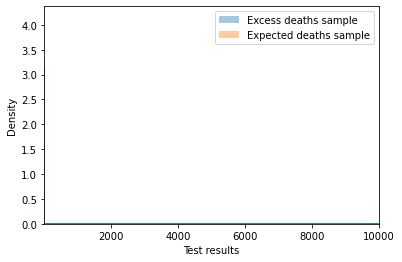

In [33]:
expected_deaths = deaths[deaths["expected_deaths"] < 10]
excess_deaths = deaths[deaths["excess_deaths"] > 1000]
sample_size1 = expected_deaths["expected_deaths"].count()
sample_size2 = excess_deaths["excess_deaths"].count()
x1 = excess_deaths["excess_deaths"].mean()
x2 = expected_deaths["expected_deaths"].mean()
p1 = deaths["excess_deaths"].mean()
p2 = deaths["expected_deaths"].mean()
s1 = excess_deaths["excess_deaths"].std()
s2 = expected_deaths["expected_deaths"].std()
num = abs((x1-x2)-(p1-p2))
den = ((s1**2)/n1) + ((s2**2)/n2)
den = math.sqrt(den)
t_score = num/den
print("Mean of excess deaths sample: ", x1 )
print("Mean of expected deaths sample: ", x2)
print("Mean of population of excess deaths: ", p1)
print("Mean of population of expected deaths: ", p2)
print("Standard deviation of excess deaths: ", s1)
print("Standard deviation of expected deaths: ", s2)
print("Sample size of expected deaths: ",sample_size1)
print("Sample size of excess deaths: ",sample_size2)
print("t-score: ", t_score)


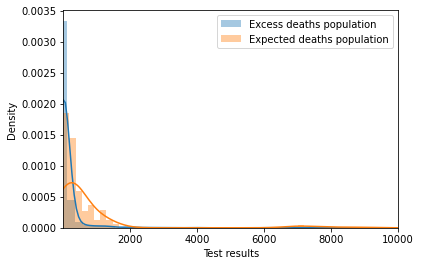

In [35]:
sns.distplot(deaths["excess_deaths"] , label = 'Excess deaths population')
sns.distplot(deaths["expected_deaths"], label = 'Expected deaths population')
plt.xlim(10, 10000)
plt.xlabel('Test results')
plt.legend()

In [12]:
rows = 2
cols = 2
dF = 1
print("Degrees of freedom: ",dF)

Degrees of freedom:  1


In [50]:
#Make table
block1 = excess_deaths[(1 < excess_deaths["week"]) & (excess_deaths["week"] < 15)]
block2 = expected_deaths[(14 < expected_deaths["week"]) & (expected_deaths["week"] < 52)]
cell1 = block1["covid_deaths"].count()
cell2 = block2["covid_deaths"].count()
cell3 = block1["non_covid_deaths"].count()
cell4 = block2["non_covid_deaths"].count()
print(cell1)
print(cell2)
print(cell3)
print(cell4)
c1 = 456
c2 = 1014
r1 = 735
r2 = 735

total = 1470
E11 = r1*c1/total
E12 = r1*c2/total
E21 = r2*c1/total
E22 = r2*c2/total
O = [cell1, cell2, cell3, cell4]
E = [E11, E12, E21, E22]
print(O)
print(E)

228
507
228
507
[228, 507, 228, 507]
[228.0, 507.0, 228.0, 507.0]


In [51]:
#Calculate F-score
chi_score = 0
for i in range(4):
    chi_score = chi_score + ((O[i] - 
    E[i]) **2)/E[i]
print("Chi-square-score: ", chi_score)

Chi-square-score:  0.0


In [63]:
#ANOVA test
#Calculate F value using ANOVA test
import numpy as np
covid1 = deaths[(1 < deaths["covid_deaths"]) & (deaths["covid_deaths"] < 200) & (1 < deaths["week"]) & deaths["week"] < 11]
covid1 = deaths[(1 < deaths["covid_deaths"]) & (deaths["covid_deaths"] < 200) & (10 < deaths["week"]) & deaths["week"] < 31]
covid1 = deaths[(1 < deaths["covid_deaths"]) & (deaths["covid_deaths"] < 200) & (30 < deaths["week"]) & deaths["week"] < 53]
x1 = np.mean(covid1["covid_deaths"])
x2 = np.mean(covid2["covid_deaths"])
x3 = np.mean(covid3["covid_deaths"])
total = x1 + x2 + x3
SSB = 1000*((x1-total)**2 + (x2-total)**2 + (x3 - total)**2)
SS1 = np.sum((covid1["covid_deaths"] - x1)**2)
SS2 = np.sum((covid2["covid_deaths"] - x2)**2)
SS3 = np.sum((covid3["covid_deaths"] - x3)**2)
SSW = SS1+SS2+SS3
df1 = 2
MSB = SSB/df1
df2 = 255
MSW = SSW/df2
F_score = MSB/MSW
print("F-score: ",F_score)

F-score:  18.50506413762189


In [47]:
deaths_us = pd.read_csv("Datasets/united_states_excess_deaths.csv")
deaths_us.head(10)

,country,region,region_code,start_date,end_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,United States,Alabama,AL,2019-12-29,2020-01-04,2020,1,4903185,1081,0,1167.309220,-86.309220,1081,0.0,-1.760268,-0.073939
1,United States,Alabama,AL,2020-01-05,2020-01-11,2020,2,4903185,1127,0,1195.142553,-68.142553,1127,0.0,-1.389761,-0.057016
2,United States,Alabama,AL,2020-01-12,2020-01-18,2020,3,4903185,1039,0,1153.142553,-114.142553,1039,0.0,-2.327927,-0.098984
3,United States,Alabama,AL,2020-01-19,2020-01-25,2020,4,4903185,1054,0,1144.975886,-90.975886,1054,0.0,-1.855445,-0.079457
4,United States,Alabama,AL,2020-01-26,2020-02-01,2020,5,4903185,1025,0,1140.142553,-115.142553,1025,0.0,-2.348322,-0.100990
5,United States,Alabama,AL,2020-02-02,2020-02-08,2020,6,4903185,1118,0,1155.475887,-37.475887,1118,0.0,-0.764317,-0.032433
6,United States,Alabama,AL,2020-02-09,2020-02-15,2020,7,4903185,1094,0,1142.309220,-48.309220,1094,0.0,-0.985262,-0.042291
7,United States,Alabama,AL,2020-02-16,2020-02-22,2020,8,4903185,1097,0,1128.309220,-31.309220,1097,0.0,-0.638549,-0.027749
8,United States,Alabama,AL,2020-02-23,2020-02-29,2020,9,4903185,1161,0,1132.642553,28.357447,1161,0.0,0.578347,0.025037
9,United States,Alabama,AL,2020-03-01,2020-03-07,2020,10,4903185,1053,0,1125.371064,-72.371064,1053,0.0,-1.476001,-0.064309


F-score:       country region  region_code start_date end_date  year  week  population  \
20       NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
21       NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
22       NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
23       NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
24       NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
...      ...    ...          ...        ...      ...   ...   ...         ...   
1017     NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
1018     NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
1019     NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
1020     NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   
1021     NaN    NaN          NaN        NaN      NaN   NaN   NaN         NaN   

      total_deaths  covid_dea

In [131]:
dictionary2 = {}
total_deaths_us = deaths_us[deaths_us["total_deaths"] > 1500]
covid_deaths_us = deaths_us[deaths_us["covid_deaths"] > 1500]
expected_deaths_us = deaths_us[deaths_us["expected_deaths"]> 1500]
excess_deaths_us = deaths_us[deaths_us["excess_deaths"]> 100]
non_covid_deaths_us = deaths_us[deaths_us["non_covid_deaths"] > 20]
covid_deaths_per_100k_us = deaths_us[deaths_us["covid_deaths_per_100k"]>10]
excess_deaths_per_100k_us = deaths_us[deaths_us["excess_deaths_per_100k"] > 0.1]
excess_deaths_pct_change_us = deaths_us[deaths_us["excess_deaths_pct_change"] > 0.1]

dictionary2["total_deaths"] = total_deaths_us["total_deaths"].count()
dictionary2["covid_deaths"] = covid_deaths_us["covid_deaths"].count()
dictionary2["expected_deaths"] = expected_deaths_us["expected_deaths"].count()
dictionary2["excess_deaths"] = excess_deaths_us["excess_deaths"].count()
dictionary2["non_covid_deaths"] = non_covid_deaths_us["non_covid_deaths"].count()
dictionary2["covid_deaths_per_100k"] = covid_deaths_per_100k_us["covid_deaths_per_100k"].count()
dictionary2["excess_deaths_per_100k"] = excess_deaths_per_100k_us["excess_deaths_per_100k"].count()
dictionary2["excess_deaths_pct_change"] = excess_deaths_pct_change_us["excess_deaths_pct_change"].count()

for i in dictionary2:
    print(i +":",dictionary2[str(i)])

total_deaths: 683
covid_deaths: 55
expected_deaths: 566
excess_deaths: 992
non_covid_deaths: 2636
covid_deaths_per_100k: 52
excess_deaths_per_100k: 1981
excess_deaths_pct_change: 1268


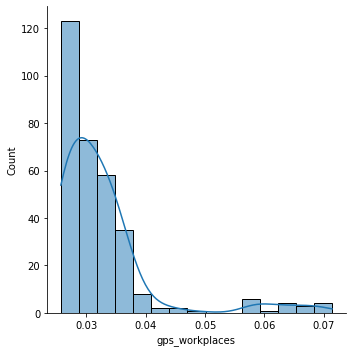

In [133]:
sns.displot(work.gps_workplaces, bins = 15 , kde = True)

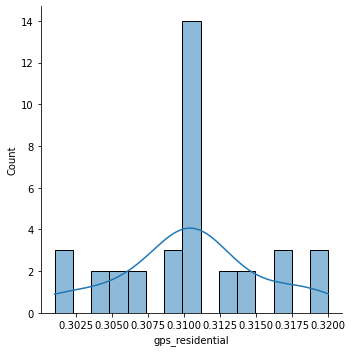

In [134]:
sns.displot(resi.gps_residential, bins = 15 , kde = True)

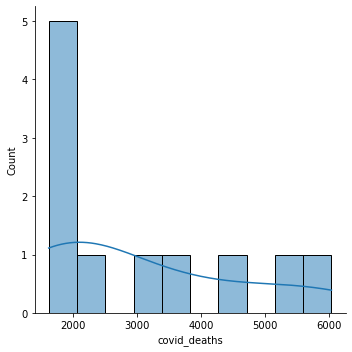

In [135]:
sns.displot(covid_deaths.covid_deaths, bins = 10, kde = True)

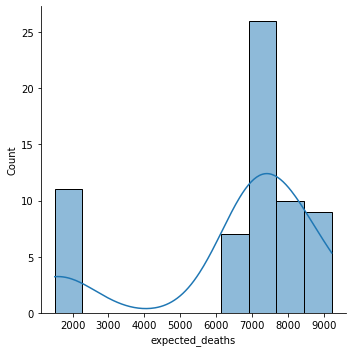

In [136]:
sns.displot(expected_deaths.expected_deaths, bins = 10, kde = True)

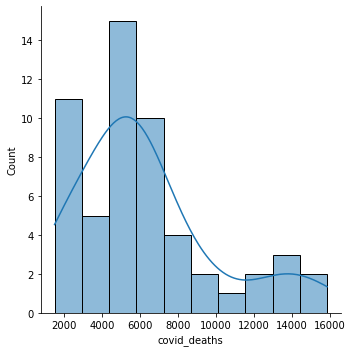

In [137]:
sns.displot(covid_deaths_us.covid_deaths, bins = 10, kde = True)

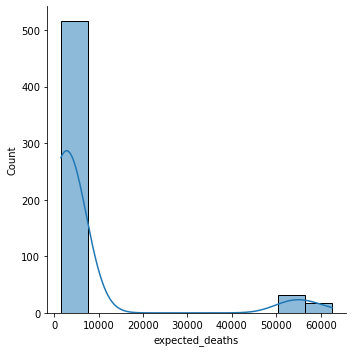

In [138]:
sns.displot(expected_deaths_us.expected_deaths, bins = 10, kde = True)

In [139]:
mobility.describe()

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_workplaces,gps_residential,gps_away_from_home
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,2020.009524,7.333333,15.876190,27.000000,-0.252719,-0.080886,-0.340571,0.114458,-0.134725
std,0.097127,2.996384,8.938179,15.297517,0.157320,0.093898,0.129044,0.057170,0.069940
min,2020.000000,1.000000,1.000000,1.000000,-0.764000,-0.374000,-0.711000,-0.025700,-0.391000
25%,2020.000000,5.000000,8.000000,14.000000,-0.353000,-0.143000,-0.413000,0.081400,-0.176000
50%,2020.000000,7.000000,16.000000,27.000000,-0.233000,-0.084300,-0.344000,0.108000,-0.126000
75%,2020.000000,10.000000,24.000000,40.000000,-0.160000,-0.024300,-0.291000,0.147000,-0.092500
max,2021.000000,12.000000,31.000000,53.000000,0.481000,0.457000,0.071400,0.320000,0.035600


In [140]:
deaths.describe()

,region_code,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
count,1040.000000,1040.0,1040.000000,1.040000e+03,1040.000000,1023.000000,1040.000000,1040.000000,1023.000000,1023.000000,1040.000000,1040.000000
mean,9.500000,2020.0,26.500000,4.673304e+06,889.336538,97.704790,756.381010,132.955529,806.037146,2.115330,2.909169,0.208928
std,5.769056,0.0,15.015552,9.947887e+06,1987.983901,388.908205,1620.299624,663.504432,1732.153506,3.828603,6.507072,0.459258
min,0.000000,2020.0,1.000000,8.466700e+04,4.000000,0.000000,7.000000,-619.000000,4.000000,0.000000,-8.267684,-0.500000
25%,4.750000,2020.0,13.750000,9.298350e+05,140.750000,0.000000,136.500000,-2.000000,142.000000,0.000000,-0.172216,-0.010519
50%,9.500000,2020.0,26.500000,1.754952e+06,305.000000,8.000000,276.000000,15.500000,285.000000,0.586047,1.423728,0.094987
75%,14.250000,2020.0,39.250000,3.261577e+06,759.250000,52.000000,693.875000,66.625000,700.500000,2.615204,3.675652,0.240518
max,19.000000,2020.0,52.000000,4.673304e+07,19358.000000,6032.000000,9224.500000,11499.000000,13326.000000,32.499396,74.293126,4.763158


In [141]:
deaths_us.describe()

,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
count,2640.0,2640.000000,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,2020.0,25.420833,1.252048e+07,2409.587500,229.551515,2115.095587,294.491913,2180.035985,1.759593,2.314486,0.140070
std,0.0,14.402374,4.419981e+07,8522.939606,1044.282976,7505.935589,1349.503969,7714.008647,3.272766,4.385713,0.291478
min,2020.0,1.000000,5.787590e+05,61.000000,-5.000000,77.022979,-1987.689362,-646.000000,-0.471983,-21.039070,-0.796012
25%,2020.0,13.000000,1.792147e+06,344.000000,1.000000,311.892766,3.791702,318.000000,0.011716,0.110806,0.006861
50%,2020.0,25.000000,4.648794e+06,954.000000,33.000000,864.375745,50.994894,871.500000,0.878822,1.580830,0.094208
75%,2020.0,38.000000,8.398748e+06,1532.500000,121.000000,1366.163191,172.051489,1404.250000,2.059243,3.278029,0.193606
max,2020.0,50.000000,3.283005e+08,79053.000000,15851.000000,62533.689362,22464.172766,65535.000000,63.283242,80.863025,6.355981
